# 波形を生成し音色を聞き比べる (1)

[C1S3_Timbre](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S3_Timbre.html)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import libfmp.b
import libfmp.c1

In [4]:
import librosa

In [5]:
import IPython.display as ipd

In [3]:
def plot_spectrogram(x, Fs=11025, N=4096, H=2048, figsize=(4, 2)):
    """Computation and subsequent plotting of the spectrogram of a signal

    Notebook: C1/C1S3_Timbre.ipynb

    Args:
        x: Signal (waveform) to be analyzed
        Fs: Sampling rate (Default value = 11025)
        N: FFT length (Default value = 4096)
        H: Hopsize (Default value = 2048)
        figsize: Size of the figure (Default value = (4, 2))

    """
    # N, H = 2048, 1024
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window=np.hanning)  # not 'hamming'
    Y = np.abs(X)
    plt.figure(figsize=figsize)
    librosa.display.specshow(librosa.amplitude_to_db(Y, ref=np.max),
                             y_axis='linear', x_axis='time', sr=Fs, hop_length=H) # cmap='gray_r'
    plt.ylim([0, 3000])
    # plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

In [135]:
Fs = 11025
dur = 4
freq = 261.626
amp = 0.5
figsize = (8, 2)

## 正弦波 (sinusoid) を生成する

* [Sine wave - Wikipedia](https://en.wikipedia.org/wiki/Sine_wave)

In [136]:
num_samples = int(Fs * dur)
t = np.arange(num_samples) / Fs
x = amp * np.sin(2*np.pi*(freq*t))

# x, t = libfmp.c1.generate_sinusoid(dur=dur, Fs=Fs, amp=amp, freq=freq)

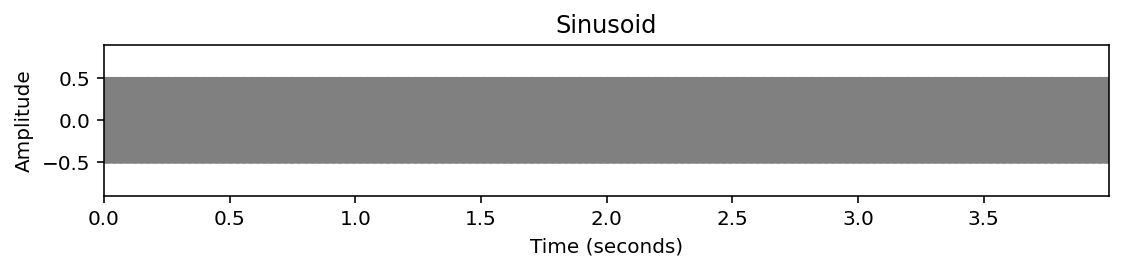

In [137]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.show()

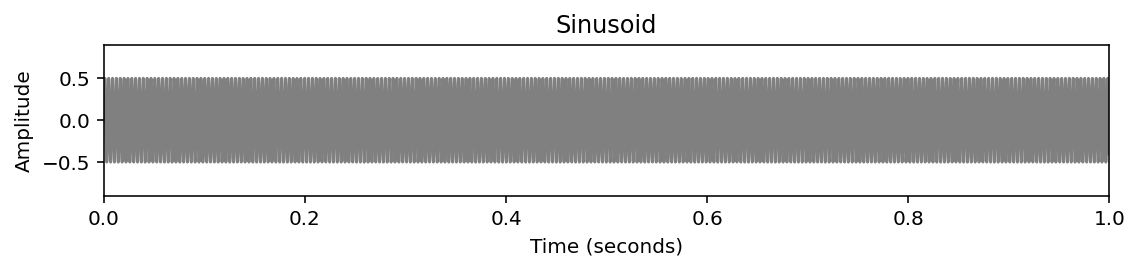

In [138]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.xlim([0, 1])
plt.show()

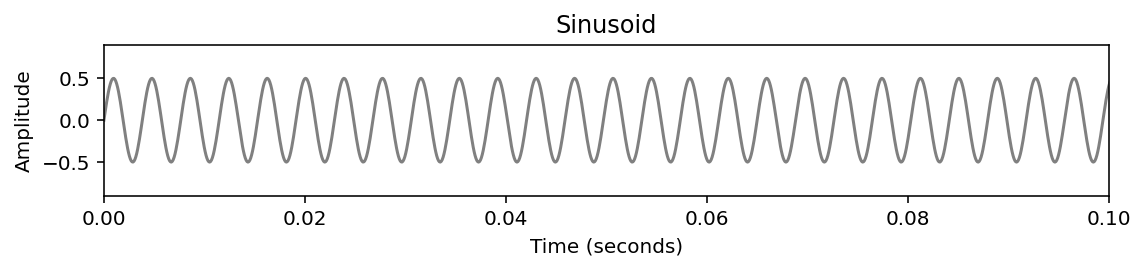

In [139]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.xlim([0, .1])
plt.show()

In [140]:
ipd.display(ipd.Audio(data=x, rate=Fs))

```{note}
スペクトログラムは、時間 (横軸)、周波数（縦軸)、信号成分の強さ（色）の三次元グラフです
```

* [Spectrogram - Wikipedia](https://en.wikipedia.org/wiki/Spectrogram)

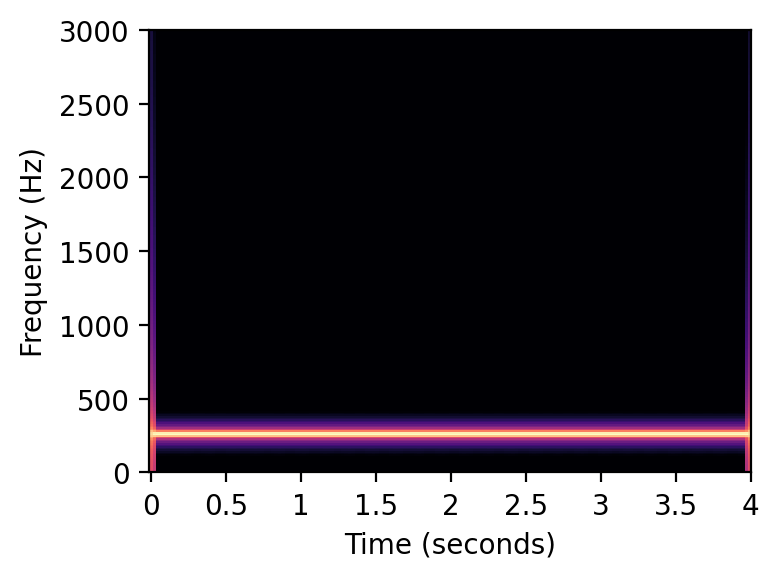

In [141]:
plot_spectrogram(x, Fs=Fs, N=1024, H=256, figsize=(4, 3))

### ADSRを加える

* [C1S3_Timbre](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S3_Timbre.html)

In [142]:
import libfmp.b
import libfmp.c1

%matplotlib inline

def compute_adsr(len_A=10, len_D=10, len_S=60, len_R=10, height_A=1.0, height_S=0.5):
    """Computation of idealized ADSR model

    Notebook: C1/C1S3_Timbre.ipynb

    Args:
        len_A (int): Length (samples) of A phase (Default value = 10)
        len_D (int): Length (samples) of D phase (Default value = 10)
        len_S (int): Length (samples) of S phase (Default value = 60)
        len_R (int): Length (samples) of R phase (Default value = 10)
        height_A (float): Height of A phase (Default value = 1.0)
        height_S (float): Height of S phase (Default value = 0.5)

    Returns:
        curve_ADSR (np.ndarray): ADSR model
    """
    curve_A = np.arange(len_A) * height_A / len_A
    curve_D = height_A - np.arange(len_D) * (height_A - height_S) / len_D
    curve_S = np.ones(len_S) * height_S
    curve_R = height_S * (1 - np.arange(1, len_R + 1) / len_R)
    curve_ADSR = np.concatenate((curve_A, curve_D, curve_S, curve_R))
    return curve_ADSR

In [153]:
curve_ADSR = compute_adsr(len_A=int(x.size*0.3), len_D=int(x.size*0.3), len_S=int(x.size*0.3), len_R=int(x.size*0.1), height_A=1.0, height_S=0.8)

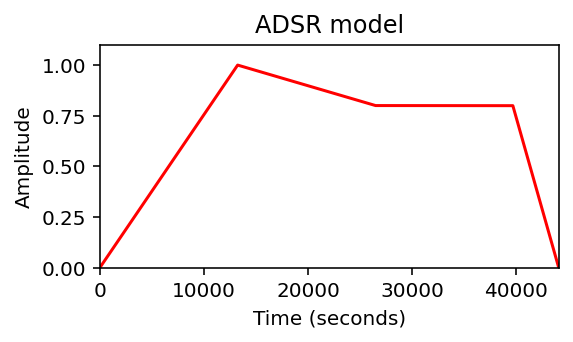

In [154]:
libfmp.b.plot_signal(curve_ADSR, figsize=(4,2.5), ylabel='Amplitude', title='ADSR model', color='red')
plt.show()

In [155]:
x, t = libfmp.c1.generate_sinusoid(dur=dur, Fs=Fs, amp=amp, freq=freq)

In [156]:
x.size, curve_ADSR.size

(44100, 44100)

In [157]:
x *= curve_ADSR

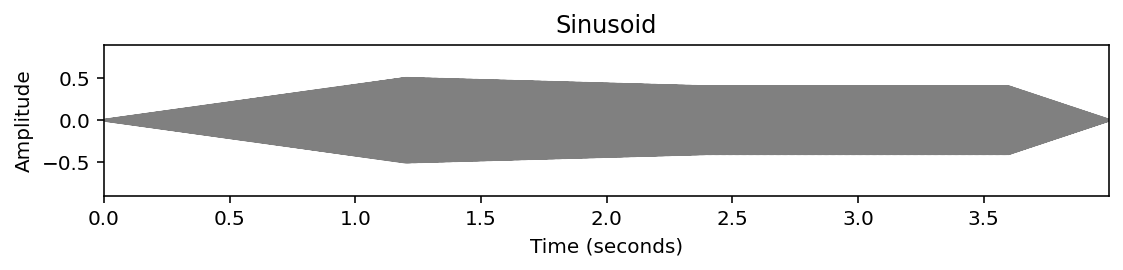

In [158]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.show()

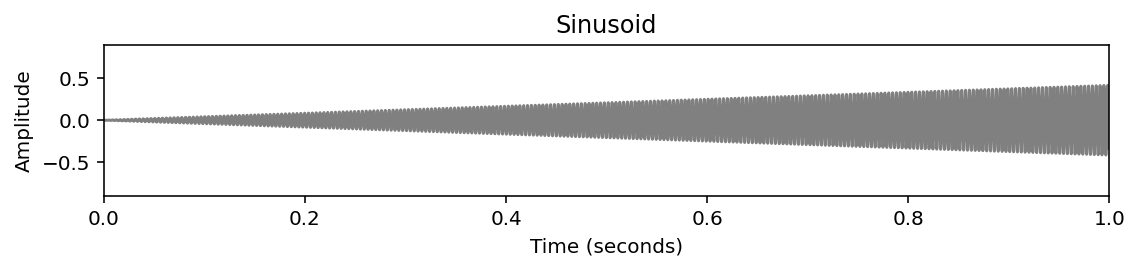

In [159]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.xlim([0, 1])
plt.show()

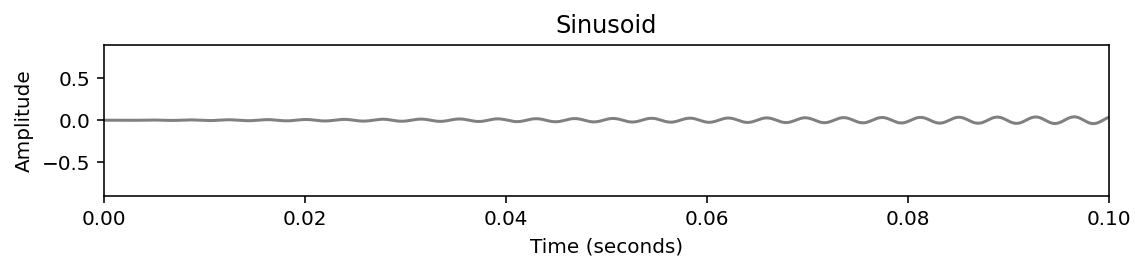

In [160]:
libfmp.b.plot_signal(x, Fs=Fs, figsize=figsize, ylabel='Amplitude', title='Sinusoid')
plt.ylim([-0.9, 0.9])
plt.xlim([0, .1])
plt.show()

In [161]:
ipd.display(ipd.Audio(data=x, rate=Fs))

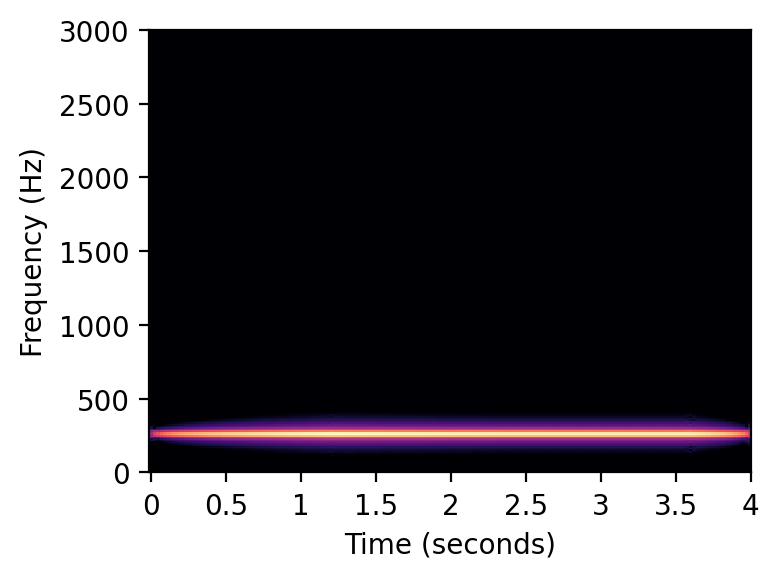

In [162]:
plot_spectrogram(x, Fs=Fs, N=1024, H=256, figsize=(4, 3))

## 倍音を持つ波形を生成する

* [Overtone - Wikipedia](https://en.wikipedia.org/wiki/Overtone)

In [163]:
t = np.arange(num_samples) / Fs
x = np.arange(num_samples) / Fs
amp = 1.0
for i in range(1, 12):
    x += (amp / i) * np.sin(2*np.pi*(freq*i*t)) * curve_ADSR

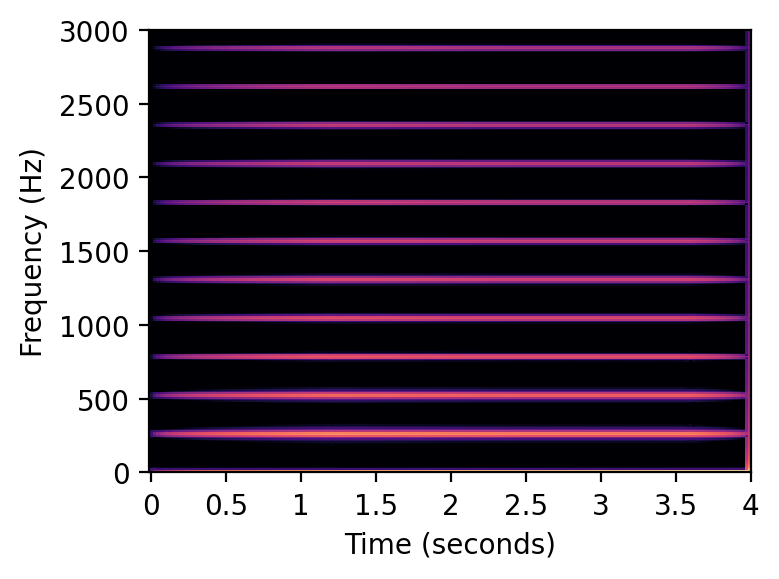

In [164]:
plot_spectrogram(x, Fs=Fs, N=1024, H=256, figsize=(4, 3))

In [165]:
ipd.display(ipd.Audio(data=x, rate=Fs))

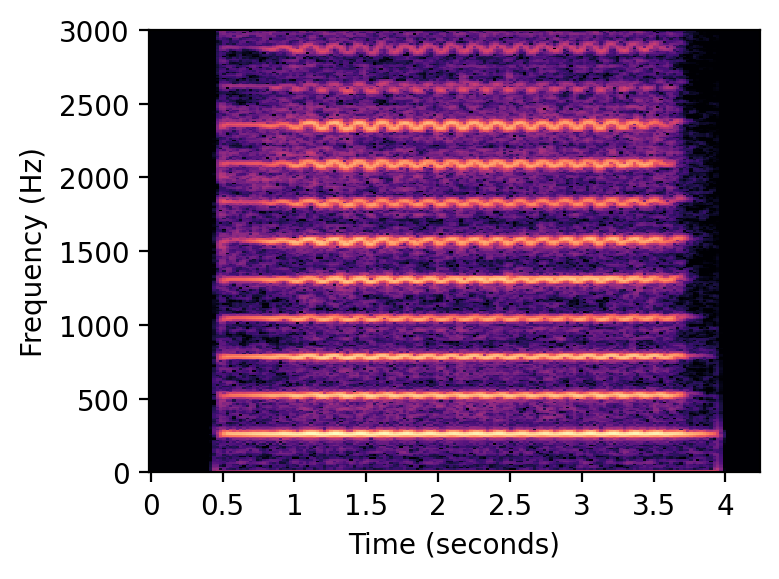

In [166]:
x_violin, Fs = librosa.load('./FMP_C1_F23_Violin.wav', sr=Fs)
plot_spectrogram(x_violin, Fs=Fs, N=1024, H=256, figsize=(4, 3))

In [167]:
ipd.display(ipd.Audio(data=x_violin, rate=Fs))